In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("clean/preprocess_csv.csv")

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
df

,district,meter,built_year,price_per_meter,room,elevator,parking,storage,floor_en,total_floor
0,35,83,1389,26506000.0,2,0.0,0.0,1.0,2,4
1,35,49,1380,23265000.0,1,0.0,0.0,1.0,1,1
2,35,50,1383,30000000.0,1,0.0,1.0,1.0,3,3
3,35,53,1378,26415000.0,1,0.0,0.0,0.0,2,4
4,35,42,1400,40000000.0,1,1.0,0.0,1.0,3,4
...,...,...,...,...,...,...,...,...,...,...
25292,57,68,1382,32353000.0,1,0.0,0.0,1.0,3,3
25293,57,70,1387,41429000.0,2,1.0,1.0,1.0,2,2
25294,57,102,1390,47059000.0,2,1.0,1.0,1.0,5,5
25295,57,131,1388,44962000.0,3,0.0,1.0,1.0,1,1


In [5]:
df.corr()

,district,meter,built_year,price_per_meter,room,elevator,parking,storage,floor_en,total_floor
district,1.000000,0.567681,-0.094408,0.850669,0.546245,0.482183,0.136711,0.033044,0.228367,0.297062
meter,0.567681,1.000000,0.111640,0.666687,0.772523,0.382437,0.243002,0.088998,0.241994,0.263581
built_year,-0.094408,0.111640,1.000000,0.098397,0.086939,0.413399,0.326706,0.077117,0.162208,0.133539
price_per_meter,0.850669,0.666687,0.098397,1.000000,0.588716,0.461409,0.214235,0.075842,0.220089,0.273149
room,0.546245,0.772523,0.086939,0.588716,1.000000,0.381765,0.276630,0.091301,0.208226,0.236202
elevator,0.482183,0.382437,0.413399,0.461409,0.381765,1.000000,0.261245,0.011976,0.293921,0.332127
parking,0.136711,0.243002,0.326706,0.214235,0.276630,0.261245,1.000000,0.218307,0.130611,0.098127
storage,0.033044,0.088998,0.077117,0.075842,0.091301,0.011976,0.218307,1.000000,0.025828,-0.003932
floor_en,0.228367,0.241994,0.162208,0.220089,0.208226,0.293921,0.130611,0.025828,1.000000,0.759717
total_floor,0.297062,0.263581,0.133539,0.273149,0.236202,0.332127,0.098127,-0.003932,0.759717,1.000000


In [6]:
df.drop(df[df['meter']>999].index, inplace =True)
df_feature=df["meter built_year room elevator parking storage floor_en total_floor district".split()]
df_label=df["price_per_meter"]

In [7]:
df_feature


,meter,built_year,room,elevator,parking,storage,floor_en,total_floor,district
0,83,1389,2,0.0,0.0,1.0,2,4,35
1,49,1380,1,0.0,0.0,1.0,1,1,35
2,50,1383,1,0.0,1.0,1.0,3,3,35
3,53,1378,1,0.0,0.0,0.0,2,4,35
4,42,1400,1,1.0,0.0,1.0,3,4,35
...,...,...,...,...,...,...,...,...,...
25292,68,1382,1,0.0,0.0,1.0,3,3,57
25293,70,1387,2,1.0,1.0,1.0,2,2,57
25294,102,1390,2,1.0,1.0,1.0,5,5,57
25295,131,1388,3,0.0,1.0,1.0,1,1,57


In [8]:
df_label


0        26506000.0
1        23265000.0
2        30000000.0
3        26415000.0
4        40000000.0
            ...    
25292    32353000.0
25293    41429000.0
25294    47059000.0
25295    44962000.0
25296    36290000.0
Name: price_per_meter, Length: 25291, dtype: float64

In [9]:
df_feature.corr()

,meter,built_year,room,elevator,parking,storage,floor_en,total_floor,district
meter,1.000000,0.115335,0.824579,0.408882,0.259919,0.094650,0.256590,0.281396,0.606715
built_year,0.115335,1.000000,0.086633,0.413318,0.326656,0.077072,0.162020,0.133434,-0.094701
room,0.824579,0.086633,1.000000,0.381660,0.276586,0.091230,0.208086,0.236078,0.546118
elevator,0.408882,0.413318,0.381660,1.000000,0.261183,0.011928,0.293830,0.332058,0.482083
parking,0.259919,0.326656,0.276586,0.261183,1.000000,0.218285,0.130541,0.098068,0.136600
storage,0.094650,0.077072,0.091230,0.011928,0.218285,1.000000,0.025782,-0.003969,0.032971
floor_en,0.256590,0.162020,0.208086,0.293830,0.130541,0.025782,1.000000,0.759717,0.228204
total_floor,0.281396,0.133434,0.236078,0.332058,0.098068,-0.003969,0.759717,1.000000,0.296976
district,0.606715,-0.094701,0.546118,0.482083,0.136600,0.032971,0.228204,0.296976,1.000000


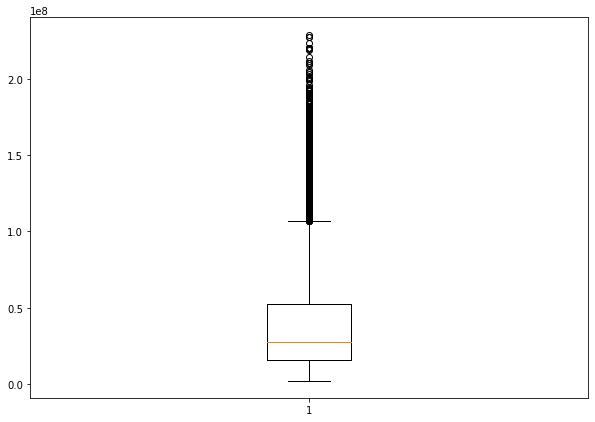

In [10]:
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df.price_per_meter)
 
# show plot
plt.show()

In [11]:
df.describe()

,district,meter,built_year,price_per_meter,room,elevator,parking,storage,floor_en,total_floor
count,25291.000000,25291.000000,25291.000000,2.529100e+04,25291.000000,25291.000000,25291.000000,25291.000000,25291.000000,25291.000000
mean,38.576925,91.914436,1391.072635,3.827058e+07,1.882409,0.621130,0.816061,0.933771,2.850816,3.545174
std,31.361943,54.680894,7.056837,3.181578e+07,0.845341,0.485115,0.387442,0.248687,2.097581,2.476965
min,1.000000,20.000000,1370.000000,2.308000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,3.000000,55.000000,1386.000000,1.600000e+07,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000
50%,38.000000,74.000000,1392.000000,2.733300e+07,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000
75%,66.000000,112.000000,1396.000000,5.238100e+07,2.000000,1.000000,1.000000,1.000000,4.000000,5.000000
max,91.000000,900.000000,1400.000000,2.288770e+08,5.000000,1.000000,1.000000,1.000000,30.000000,30.000000


In [12]:
df_feature.drop(df_feature[df_feature['meter']>999].index, inplace =True)

/home/nas/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
df_feature.describe()

,meter,built_year,room,elevator,parking,storage,floor_en,total_floor,district
count,25291.000000,25291.000000,25291.000000,25291.000000,25291.000000,25291.000000,25291.000000,25291.000000,25291.000000
mean,91.914436,1391.072635,1.882409,0.621130,0.816061,0.933771,2.850816,3.545174,38.576925
std,54.680894,7.056837,0.845341,0.485115,0.387442,0.248687,2.097581,2.476965,31.361943
min,20.000000,1370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
25%,55.000000,1386.000000,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000
50%,74.000000,1392.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,38.000000
75%,112.000000,1396.000000,2.000000,1.000000,1.000000,1.000000,4.000000,5.000000,66.000000
max,900.000000,1400.000000,5.000000,1.000000,1.000000,1.000000,30.000000,30.000000,91.000000


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feature, df_label, test_size=0.2 , random_state=85)
# X_train.shape

In [15]:
X_test.shape

(5059, 9)

In [16]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train, y_train)
X_test_scaled = min_max_scaler.fit_transform(X_test, y_test)
X_train_scaled


array([[0.05909091, 0.93333333, 0.2       , ..., 0.06666667, 0.09677419,
        0.21111111],
       [0.03636364, 0.36666667, 0.2       , ..., 0.        , 0.03225806,
        0.37777778],
       [0.10227273, 0.5       , 0.4       , ..., 0.06666667, 0.19354839,
        0.87777778],
       ...,
       [0.16477273, 0.56666667, 0.6       , ..., 0.03333333, 0.06451613,
        0.87777778],
       [0.06590909, 1.        , 0.4       , ..., 0.06666667, 0.16129032,
        0.83333333],
       [0.13977273, 0.5       , 0.6       , ..., 0.06666667, 0.09677419,
        1.        ]])

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
ridge_m = Ridge(alpha=0.5)
ridge_m.fit(X_train_scaled, y_train)
print("Ridge intercept divar scaled: ", ridge_m.intercept_)
print("Ridge coef divar scaled: ", ridge_m.coef_)

Ridge intercept divar scaled:  -11211529.34316668
Ridge coef divar scaled:  [ 1.93851650e+08  2.19907590e+07 -2.00893374e+07 -4.42210311e+06
  8.99709484e+05  1.46248726e+06 -9.23027687e+06 -4.73426425e+06
  6.71958828e+07]


In [18]:
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
ridge_m = Ridge(alpha=0.5)
ridge_m.fit(X_train, y_train)
print("Ridge intercept divar: ", ridge_m.intercept_)
print("Ridge coef divar: ", ridge_m.coef_)

Ridge intercept divar:  -1017881625.2922319
Ridge coef divar:  [  225850.38080777   731019.48647877 -4267760.66077522 -4426959.78942078
   891378.7568814   1441099.5241626   -316588.25372076  -153686.20931537
   744784.82660734]


In [19]:
sgd_divar = SGDRegressor(max_iter=100000, tol=1e-5, eta0=0.1, random_state=42)
sgd_divar.fit(X_train_scaled, y_train)
print("SGD intercept divar scaled: ", sgd_divar.intercept_)
print("SGD coef divar scaled: ", sgd_divar.coef_)

SGD intercept divar scaled:  [-11918358.30328762]
SGD coef divar scaled:  [ 1.79285246e+08  2.17548674e+07 -1.62228692e+07 -3.36966621e+06
  9.77260273e+05  1.92231493e+06 -8.32453900e+06 -4.60152168e+06
  6.81247089e+07]


In [20]:
from sklearn.preprocessing import PolynomialFeatures
polyRegressor = PolynomialFeatures(degree=2)
X_train_poly = polyRegressor.fit_transform(X_train)
X_test_poly = polyRegressor.fit_transform(X_test)
poly = LinearRegression()
poly.fit(X_train_poly, y_train)
prediction_plr = poly.predict(X_test_poly)

In [21]:
lm_divar = LinearRegression()

In [22]:
lm_divar.fit(X_train_scaled,y_train)

LinearRegression()

In [23]:
prediction_lm = lm_divar.predict(X_test_scaled)
prediction_rb = ridge_m.predict(X_test_scaled)
prediction_sgd = sgd_divar.predict(X_test_scaled)

In [24]:
from sklearn import metrics
MSE_lm = metrics.mean_squared_error(y_test, prediction_lm)
MSE_rb = metrics.mean_squared_error(y_test, prediction_rb)
MSE_sgd = metrics.mean_squared_error(y_test, prediction_sgd)
print("LR MSE:",np.sqrt( MSE_lm))
print("Ridge MSE:",np.sqrt( MSE_rb))
print("SGD MSE:", np.sqrt(MSE_sgd))

LR MSE: 14762799.078285
Ridge MSE: 1058588460.9882435
SGD MSE: 14711167.07745347


In [25]:
from sklearn.model_selection import cross_val_score as cvs

In [26]:
accuracy_lr = cvs(LinearRegression(), X_train, y_train, scoring='r2', cv=10)
accuracy_rb = cvs(Ridge(), X_train, y_train, scoring='r2', cv=10)
accuracy_sgd = cvs(SGDRegressor(), X_train_scaled, y_train, scoring='r2', cv=10)
print("cross val mean LR:", accuracy_lr.mean())
print("cross val mean Ridge:", accuracy_rb.mean())
print("cross val mean SGD:", accuracy_sgd.mean())

cross val mean LR: 0.8161777527349484
cross val mean Ridge: 0.8161778496922935
cross val mean SGD: 0.8131538055634409


In [27]:
accuracy_lr = cvs(LinearRegression(), X_test, y_test, scoring='r2', cv=10)
accuracy_rb = cvs(Ridge(), X_test, y_test, scoring='r2', cv=10)
accuracy_sgd = cvs(SGDRegressor(), X_test_scaled, y_test, scoring='r2', cv=10)
print("cross val mean LR:", accuracy_lr.mean())
print("cross val mean Ridge:", accuracy_rb.mean())
print("cross val mean SGD:", accuracy_sgd.mean())

cross val mean LR: 0.7905993214847984
cross val mean Ridge: 0.7906012472133953
cross val mean SGD: 0.77652857619091
